In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [2]:

wdir = "/nfs/a1/homes/py15jmc/"
coherence_all = np.load(wdir + "bootstrap/coherence_2015.npy")
prob_med_nonratio = np.load("/nfs/a1/homes/py15jmc/bootstrap/2023/Sibling_sel_window_metrics/actual/probabilities_112_113_median_ratio_nonratio.npy")
prob_med = np.load("/nfs/a1/homes/py15jmc/bootstrap/2023/Sibling_sel_window_metrics/actual/probabilities_112_113_median.npy")
dates = np.load(wdir + "dates.npy")

In [11]:
dates_dt = [datetime.strptime(str(date), "%Y%m%d") for date in dates]

In [19]:
bbox = [100, 118, 1267, 1328]

bbox = [43, 60, 320, 360]

bbox = [0, 17, 490, 550]


In [20]:
mask = np.zeros(coherence_all[0].shape, dtype=bool)
mask[bbox[0]:bbox[1], bbox[2]:bbox[3]] = True

In [21]:
mean_coh = np.array([np.mean(abs(coherence_all[i, mask])) for i in range(coherence_all.shape[0])])
std_coh = np.array([np.std(abs(coherence_all[i, mask])) for i in range(coherence_all.shape[0])])

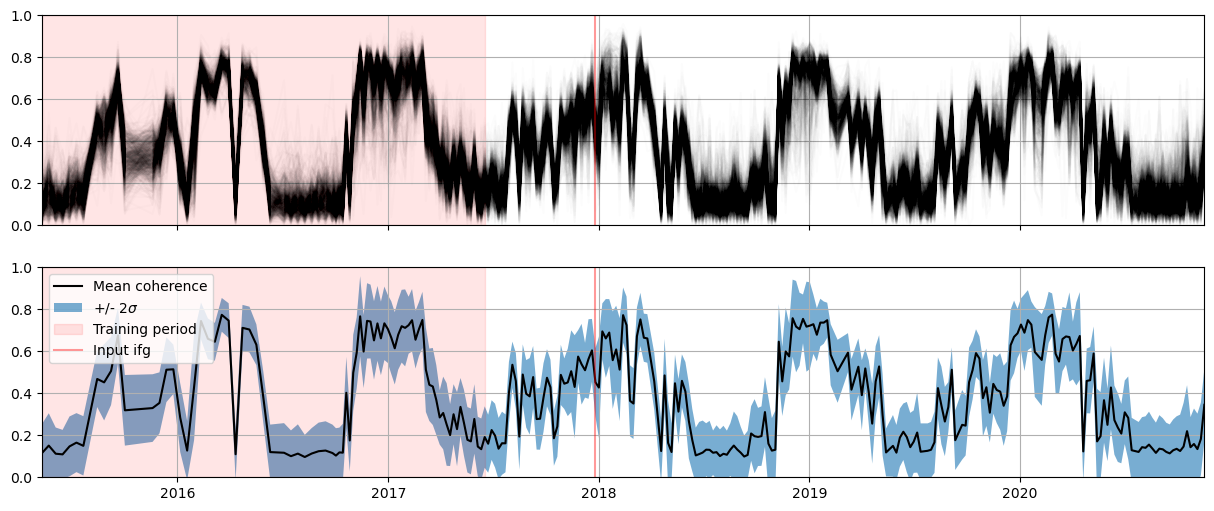

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 6), sharex=True)

ax[0].plot(dates_dt[:-1], abs(coherence_all[:, mask]), color="black", alpha=0.01)
ax[0].set_ylim([0, 1])
ax[0].axvspan(dates_dt[0], dates_dt[81], color='red', alpha=0.1)
ax[0].axvline(dates_dt[113], color='red', alpha=0.4)
ax[0].grid()

ax[1].plot(dates_dt[:-1], mean_coh, color='black', label="Mean coherence")
ax[1].fill_between(dates_dt[:-1], mean_coh-2*std_coh, mean_coh+2*std_coh, alpha=0.6, label="+/- 2$\sigma$")
ax[1].set_ylim([0, 1])
ax[1].set_xlim([dates_dt[0], dates_dt[-2]])
ax[1].axvspan(dates_dt[0], dates_dt[81], color='red', alpha=0.1, label="Training period")
ax[1].axvline(dates_dt[113], color='red', alpha=0.4, label="Input ifg")
ax[1].grid()
ax[1].legend()


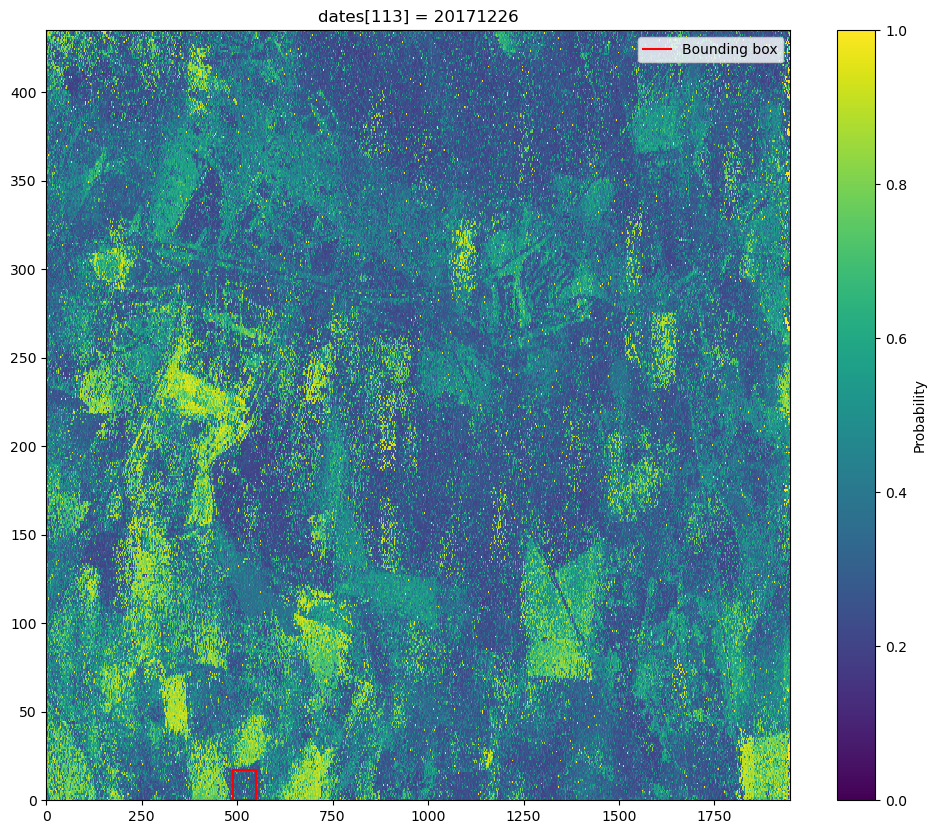

In [23]:
plt.figure(figsize=(12, 10))
p = plt.pcolormesh(1-prob_med, vmin=0, vmax=1)
cbar = plt.colorbar(p)
cbar.ax.set_ylabel("Probability")
plt.plot([bbox[2], bbox[2], bbox[3], bbox[3], bbox[2]], [bbox[0], bbox[1], bbox[1], bbox[0], bbox[0]], color='red', label="Bounding box")


# plt.plot([bbox2[2], bbox2[2], bbox2[3], bbox2[3], bbox2[2]], [bbox2[0], bbox2[1], bbox2[1], bbox2[0], bbox2[0]], color='red', label="Bounding box")

plt.title(f"{dates[113] = }")
plt.legend()